In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [7]:

data=pd.read_csv("heart.csv")

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
data.shape

(1025, 14)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [12]:
x=data.drop("target",axis=1)
y=data['target']

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf= RandomForestClassifier(random_state=42 , n_jobs=-1, max_depth=5 ,n_estimators=100 , oob_score=True)

In [21]:
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89       159
           1       0.84      0.95      0.89       149

    accuracy                           0.89       308
   macro avg       0.89      0.89      0.89       308
weighted avg       0.90      0.89      0.89       308



In [24]:
oob_score=rf.oob_score_
print(f"out_of_bag(oob) score :{oob_score}")

out_of_bag(oob) score :0.9121338912133892


# hyperparameter tuning

In [27]:
rf= RandomForestClassifier(random_state=42 , n_jobs=-1)
params={
        'max_depth' : [2,3,5,10,20],
        'min_samples_leaf':[5,10,20,50,100,200],
        'n_estimators':[10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                          param_grid=params,
                          cv=4,
                         n_jobs=-1,verbose=1,scoring="accuracy"
                          )
grid_search.fit(x_train,y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [29]:
grid_search.best_score_

0.9121042830540037

In [32]:
rf_best=grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=42)

[Text(0.48641304347826086, 0.9444444444444444, 'cp <= 0.5\ngini = 0.499\nsamples = 455\nvalue = [347, 370]\nclass = No disease'),
 Text(0.28804347826086957, 0.8333333333333334, 'thalach <= 181.5\ngini = 0.383\nsamples = 228\nvalue = [268, 93]\nclass = Disease'),
 Text(0.266304347826087, 0.7222222222222222, 'fbs <= 0.5\ngini = 0.336\nsamples = 218\nvalue = [268, 73]\nclass = Disease'),
 Text(0.24456521739130435, 0.6111111111111112, 'thal <= 2.5\ngini = 0.373\nsamples = 190\nvalue = [221.0, 73.0]\nclass = Disease'),
 Text(0.11956521739130435, 0.5, 'restecg <= 0.5\ngini = 0.491\nsamples = 88\nvalue = [79, 60]\nclass = Disease'),
 Text(0.06521739130434782, 0.3888888888888889, 'ca <= 0.5\ngini = 0.368\nsamples = 45\nvalue = [53, 17]\nclass = Disease'),
 Text(0.043478260869565216, 0.2777777777777778, 'slope <= 1.5\ngini = 0.255\nsamples = 16\nvalue = [3, 17]\nclass = No disease'),
 Text(0.021739130434782608, 0.16666666666666666, 'gini = 0.0\nsamples = 10\nvalue = [0, 12]\nclass = No disease'

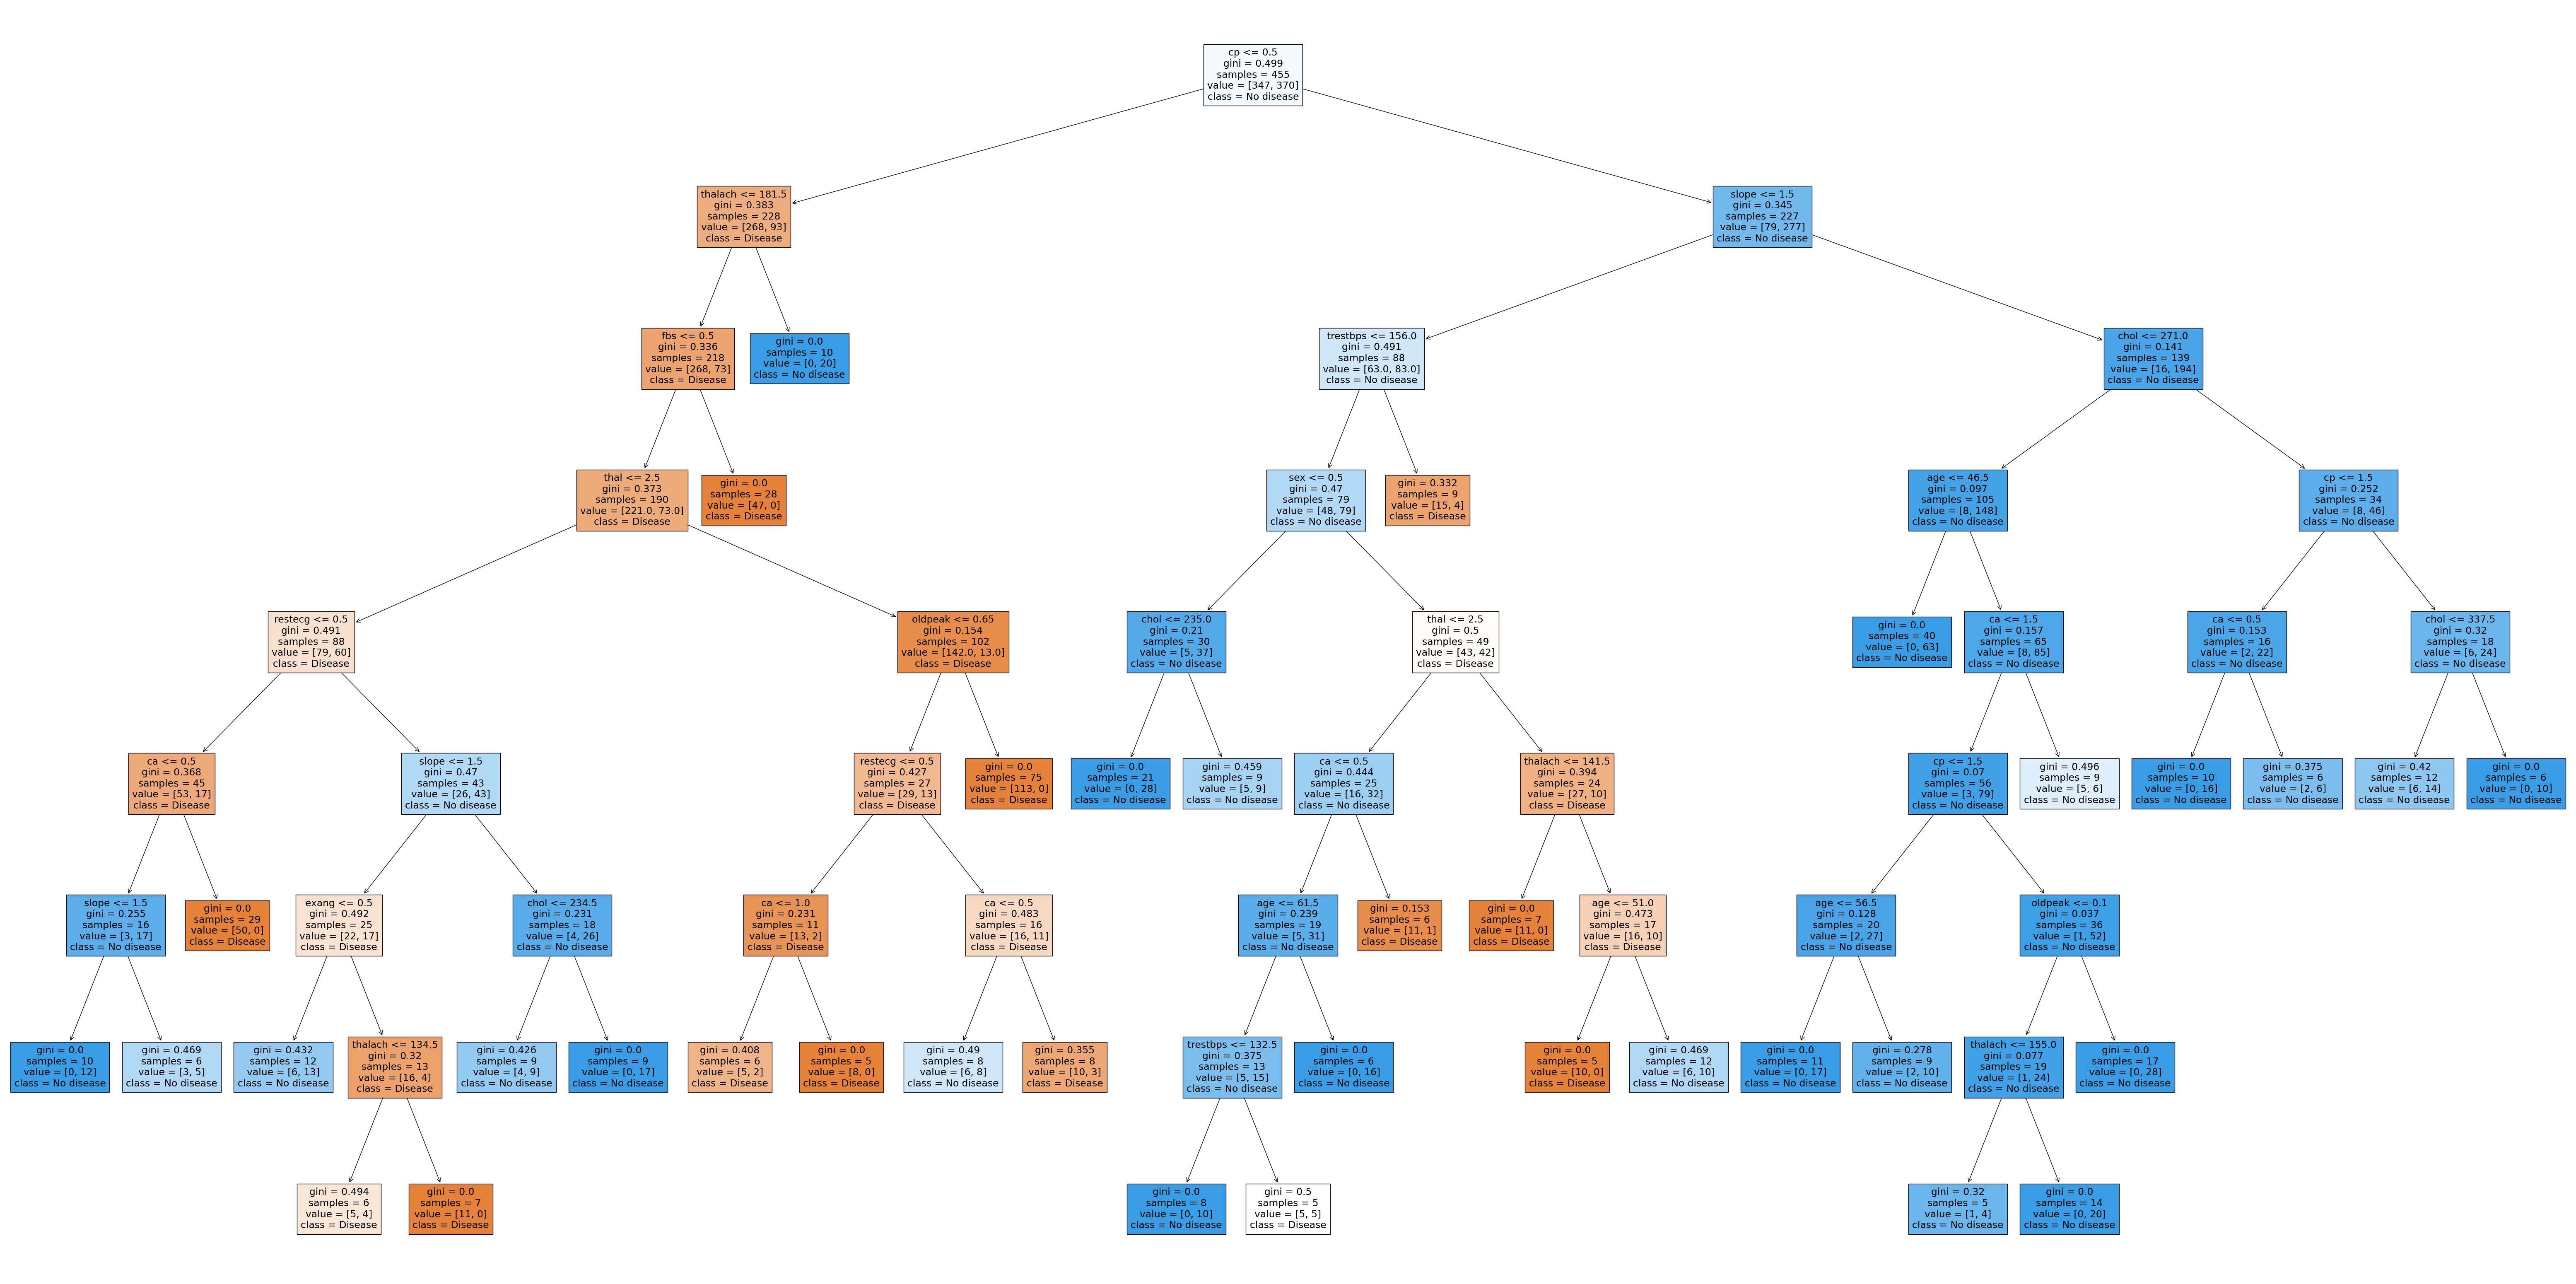

In [37]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5],feature_names=x.columns.tolist(), class_names=['Disease','No disease'],filled=True)


[Text(0.4494047619047619, 0.9545454545454546, 'sex <= 0.5\ngini = 0.497\nsamples = 452\nvalue = [332, 385]\nclass = No disease'),
 Text(0.21428571428571427, 0.8636363636363636, 'thalach <= 147.5\ngini = 0.41\nsamples = 135\nvalue = [63, 156]\nclass = No disease'),
 Text(0.11904761904761904, 0.7727272727272727, 'cp <= 0.5\ngini = 0.497\nsamples = 41\nvalue = [36, 31]\nclass = Disease'),
 Text(0.07142857142857142, 0.6818181818181818, 'thalach <= 142.5\ngini = 0.375\nsamples = 29\nvalue = [33, 11]\nclass = Disease'),
 Text(0.047619047619047616, 0.5909090909090909, 'thal <= 2.5\ngini = 0.459\nsamples = 20\nvalue = [18, 10]\nclass = Disease'),
 Text(0.023809523809523808, 0.5, 'gini = 0.355\nsamples = 10\nvalue = [3, 10]\nclass = No disease'),
 Text(0.07142857142857142, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [15, 0]\nclass = Disease'),
 Text(0.09523809523809523, 0.5909090909090909, 'gini = 0.117\nsamples = 9\nvalue = [15, 1]\nclass = Disease'),
 Text(0.16666666666666666, 0.6818181818181818,

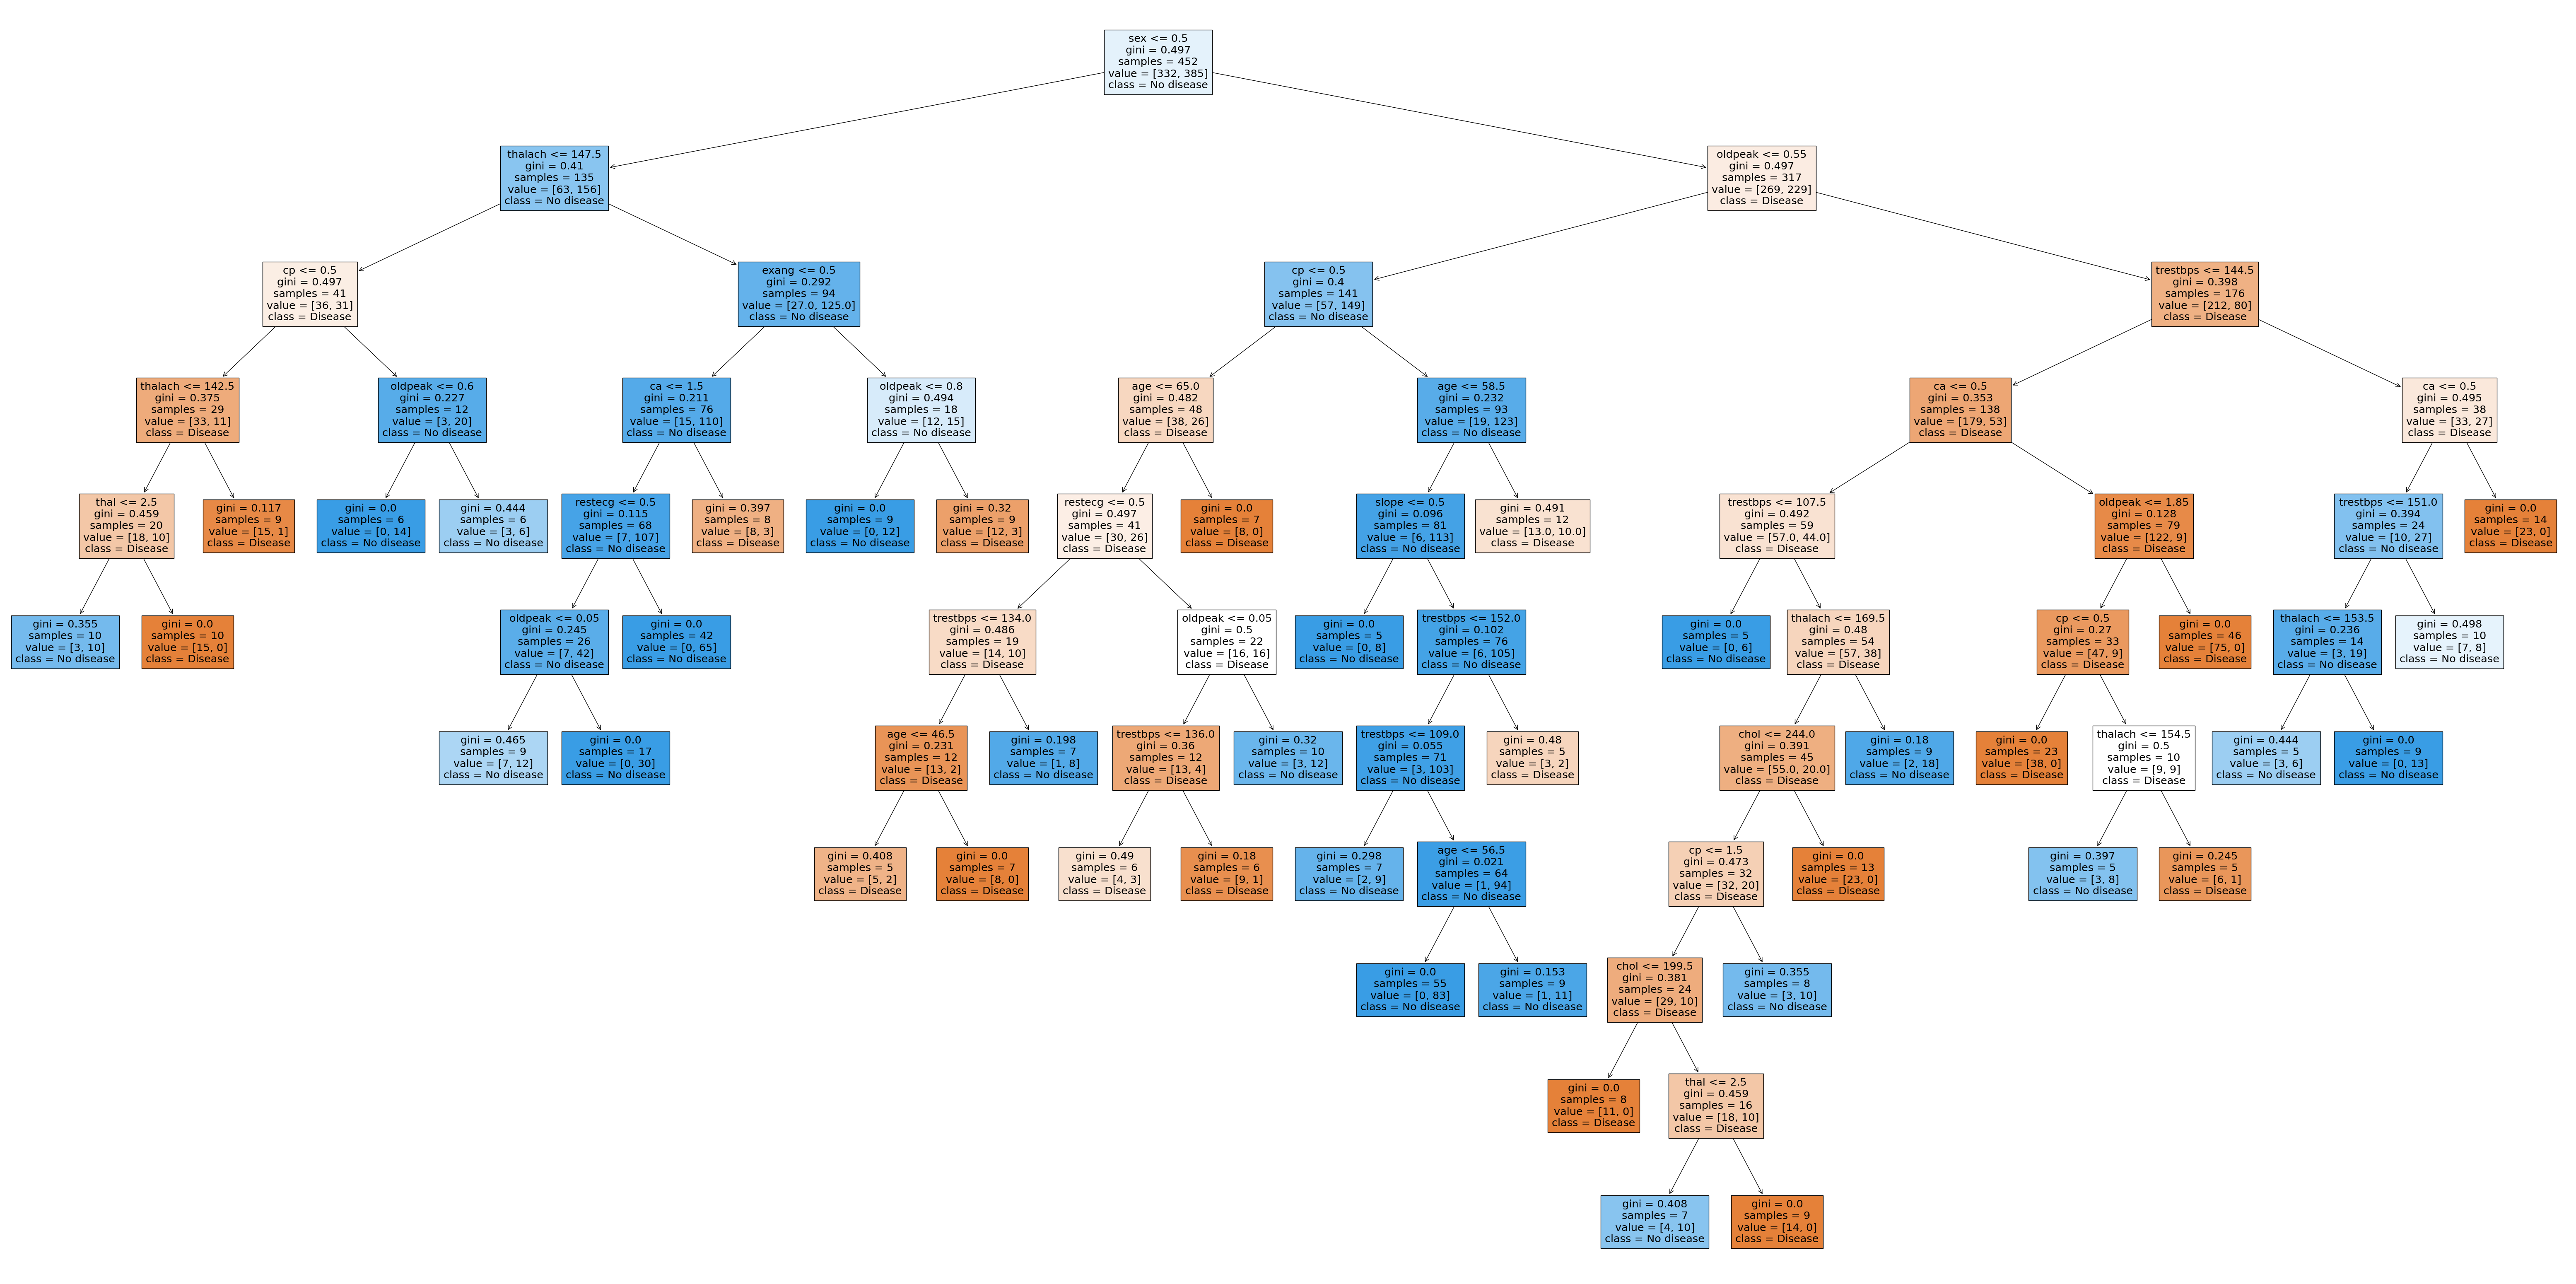

In [38]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7],feature_names=x.columns.tolist(), class_names=['Disease','No disease'],filled=True)


In [39]:
rf_best.feature_importances_


array([0.06694462, 0.02859054, 0.16355485, 0.0511375 , 0.05995325,
       0.00385975, 0.01116668, 0.10976216, 0.05001023, 0.11788114,
       0.04864435, 0.13965387, 0.14884106])

In [40]:
imp_df= pd.DataFrame({
    "Varname" : x_train.columns,
    "imp" : rf_best.feature_importances_
})
imp_df.sort_values(by='imp', ascending=False)

,Varname,imp
2,cp,0.163555
12,thal,0.148841
11,ca,0.139654
9,oldpeak,0.117881
7,thalach,0.109762
0,age,0.066945
4,chol,0.059953
3,trestbps,0.051137
8,exang,0.050010
10,slope,0.048644
